<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" heiht= 250 width= 250 alt=" ">  

|Fecha|Email|
|-----|-----|
|24 de abril|luishernandezmatos@yahoo.com

# Web_scraping_json file y CountVec

In [1]:
import pandas as pd
import json

In [3]:
df = pd.read_json('https://raw.githubusercontent.com/KeithGalli/sklearn/master/data/sentiment/Books_small_10000.json', lines = True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F2H80A1ZNN1N,B00GDM3NQC,Connie Correll,"[0, 0]","I bought both boxed sets, books 1-5. Really a...",5,Can't stop reading!,1390435200,"01 23, 2014"
1,AI3DRTKCSK4KX,B00A5MREAM,Grandma,"[0, 0]",I enjoyed this short book. But it was way way ...,3,A leaf on the wind of all hallows,1399593600,"05 9, 2014"
2,A3KAKFHY9DAC8A,0446547573,"toobusyreading ""Inspired Kathy""","[1, 1]",I love Nicholas Sparks. I&#8217;ve read everyt...,4,Great writing from Nicholas Sparks.,1404518400,"07 5, 2014"
3,ATYBCYD6BIXVL,0955809215,Chrissie,"[0, 0]",I really enjoyed this adventure and look forwa...,4,great,1389225600,"01 9, 2014"
4,A17K95SEU3J68U,0991500776,"Sirde ""artist761""","[0, 0]",It was a decent read.. typical story line. Not...,3,It was a decent read.. typical story line ...,1404864000,"07 9, 2014"


In [4]:
df.shape

(10000, 9)

In [6]:
df.summary.unique()

array(["Can't stop reading!", 'A leaf on the wind of all hallows',
       'Great writing from Nicholas Sparks.', ...,
       'an anchor might have helped....',
       'Must Read Series - Timing is Everything',
       'This story grew on me!'], dtype=object)

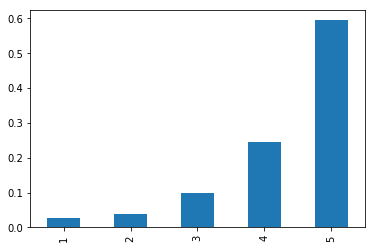

In [51]:
%matplotlib inline
df.overall.value_counts(normalize = True).sort_index().plot(kind= 'bar')

In [8]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
reviewerID        10000 non-null object
asin              10000 non-null object
reviewerName      9957 non-null object
helpful           10000 non-null object
reviewText        10000 non-null object
overall           10000 non-null int64
summary           10000 non-null object
unixReviewTime    10000 non-null int64
reviewTime        10000 non-null object
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


###  Features and response

In [10]:
X = df.reviewText
y = df.overall
X.shape , y.shape

((10000,), (10000,))

### Dividir la data en entrenamiento y test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape

(7500,)

### CountVectorizer  de entrenamiento y test 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()

In [13]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<7500x28074 sparse matrix of type '<class 'numpy.int64'>'
	with 478803 stored elements in Compressed Sparse Row format>

In [14]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<2500x28074 sparse matrix of type '<class 'numpy.int64'>'
	with 156364 stored elements in Compressed Sparse Row format>

### Modelo SVM

In [15]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
%time svc.fit(X_train_dtm, y_train)

Wall time: 2min 22s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# prediccion 
svc_pred = svc.predict(X_test_dtm)

In [17]:
#evaluacion de la presicion
from sklearn import metrics
metrics.accuracy_score(y_test, svc_pred)

0.5904

In [18]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        96
           3       0.00      0.00      0.00       244
           4       0.00      0.00      0.00       622
           5       0.59      1.00      0.74      1476

   micro avg       0.59      0.59      0.59      2500
   macro avg       0.12      0.20      0.15      2500
weighted avg       0.35      0.59      0.44      2500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###  Modelo Descicion Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dct =DecisionTreeClassifier()
%time dct.fit(X_train_dtm, y_train)

Wall time: 19.6 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_dct = dct.predict(X_test_dtm)

In [21]:
metrics.accuracy_score(y_test, y_dct)

0.5092

In [22]:
print(metrics.classification_report(y_test, y_dct))

              precision    recall  f1-score   support

           1       0.08      0.06      0.07        62
           2       0.10      0.08      0.09        96
           3       0.17      0.16      0.16       244
           4       0.32      0.30      0.31       622
           5       0.66      0.70      0.68      1476

   micro avg       0.51      0.51      0.51      2500
   macro avg       0.27      0.26      0.26      2500
weighted avg       0.49      0.51      0.50      2500



### Navie Bayes Multinomial

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

Wall time: 135 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
y_nb = nb.predict(X_test_dtm)

In [25]:
metrics.accuracy_score(y_test, y_nb)

0.6096

In [26]:
print(metrics.classification_report(y_test, y_nb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        96
           3       0.37      0.04      0.07       244
           4       0.38      0.23      0.29       622
           5       0.65      0.93      0.77      1476

   micro avg       0.61      0.61      0.61      2500
   macro avg       0.28      0.24      0.23      2500
weighted avg       0.52      0.61      0.53      2500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Tuning the model Desicion Tree

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
param_dist = dict( criterion= ['gini', 'entropy'], splitter = ['best', 'random'],
                class_weight=['balanced'])

In [29]:
rand = RandomizedSearchCV(dct, param_dist, cv=10, scoring='accuracy', n_iter=4,
                         random_state = 5,
                         return_train_score=False)

In [30]:
rand.fit(X_train_dtm, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=4, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'class_weight': ['balanced']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score=False, scoring='accuracy', verbose=0)

In [31]:
rand.best_score_

0.4824

In [32]:
rand.best_params_

{'splitter': 'random', 'criterion': 'gini', 'class_weight': 'balanced'}

# predricir el modelo con el atributo summary

In [33]:
#faeture and response
X = df.summary
y= df.overall
X.shape, y.shape

((10000,), (10000,))

In [34]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =1)

In [35]:
#Countvect
vect = CountVectorizer()

In [36]:
X_train_vect = vect.fit_transform(X_train)

In [37]:
X_test_vect = vect.transform(X_test)

In [38]:
dct.fit(X_train_vect, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y_pred = dct.predict(X_test_vect)

In [40]:
metrics.accuracy_score(y_test, y_pred)

0.5716

In [42]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.21      0.14      0.17        66
           2       0.13      0.10      0.11        91
           3       0.29      0.29      0.29       240
           4       0.36      0.32      0.34       597
           5       0.71      0.76      0.73      1506

   micro avg       0.57      0.57      0.57      2500
   macro avg       0.34      0.32      0.33      2500
weighted avg       0.55      0.57      0.56      2500



### RadomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
%time rf.fit(X_train_vect, y_train)

Wall time: 1min 36s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = rf.predict(X_test_vect)

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.6176

In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.15      0.21        66
           2       0.24      0.11      0.15        91
           3       0.40      0.27      0.32       240
           4       0.41      0.28      0.34       597
           5       0.69      0.86      0.77      1506

   micro avg       0.62      0.62      0.62      2500
   macro avg       0.42      0.33      0.36      2500
weighted avg       0.57      0.62      0.58      2500

